In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# Data Cleaning
# EDA
# Text Preprocessing
# Model Building
# Model Evaluation and Improvement
# Website
# Deployment

## ***Data Cleaning***

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# renaming the columns
df.rename(columns={'v1':'target', 'v2' : 'text'}, inplace = True)



In [10]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']= encoder.fit_transform(df['target'])

In [12]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# checking for missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
  # removing duplicates

  df.duplicated().sum()
  df= df.drop_duplicates(keep='first')

In [15]:
df. duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## ***EDA***

In [17]:
# to check if the data is imbalanced or not

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7e1b4dd7d780>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham sms'),
  Text(1.014499764949479, -0.4251943401757036, 'spam sms')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

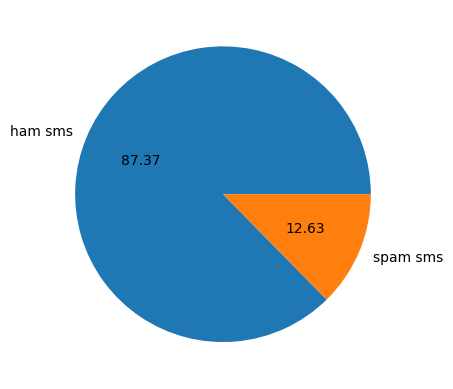

In [18]:
# Visualizing the Target Data Stats
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham sms','spam sms'], autopct="%0.2f")

In [19]:
# After this visualization we can clearly state that the given data is imbalanced as 87.37 %  is Ham sms
# only remaining 12.63 % is Spam sms

In [20]:
!pip install nltk

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
df['num_characters']=df['text'].apply(len)
df.head()


<ipython-input-23-cb9e923648ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
#calculate number of words

df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [25]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

<ipython-input-25-14051c0e9706>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

<ipython-input-27-ff4d7395e232>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
# df.describe()
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# we will now analyze stats individually for ham and spam sms.


#HAM


df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#Spam


df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

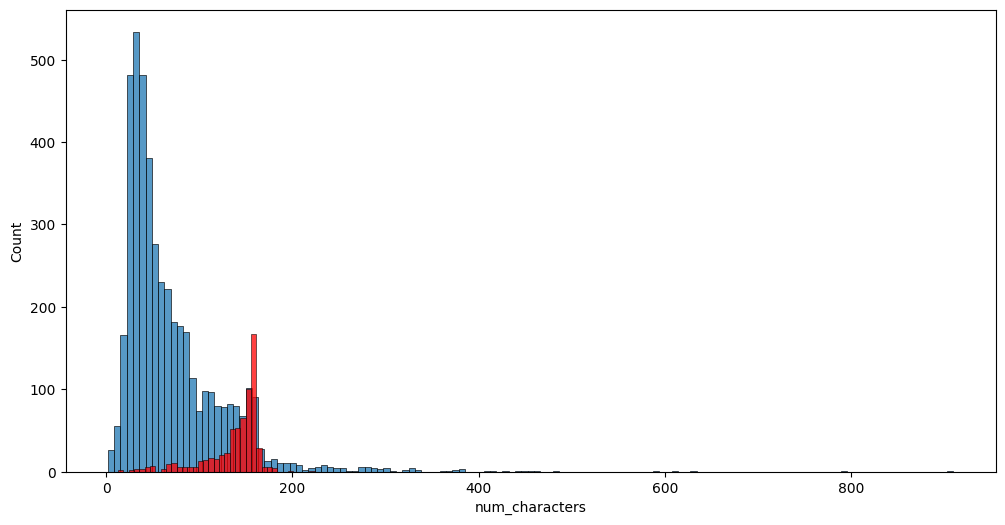

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

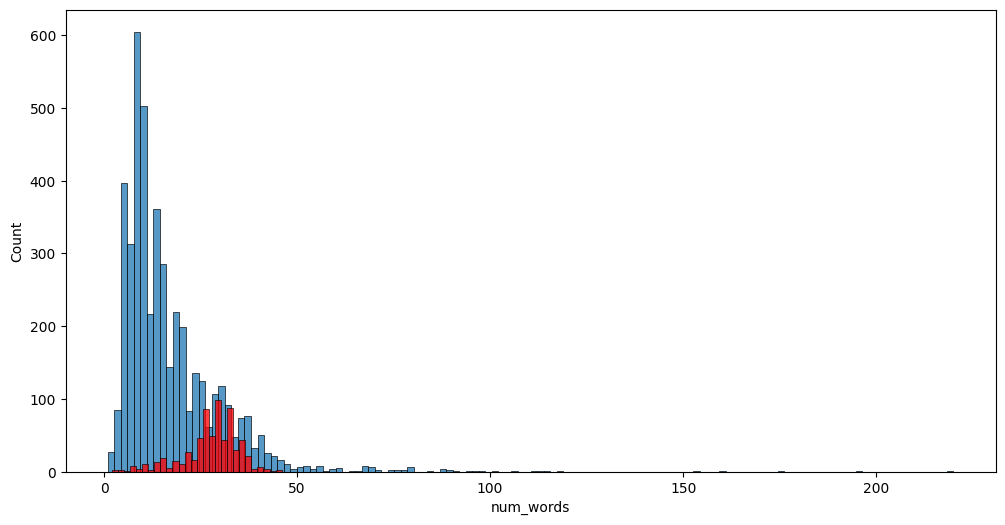

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

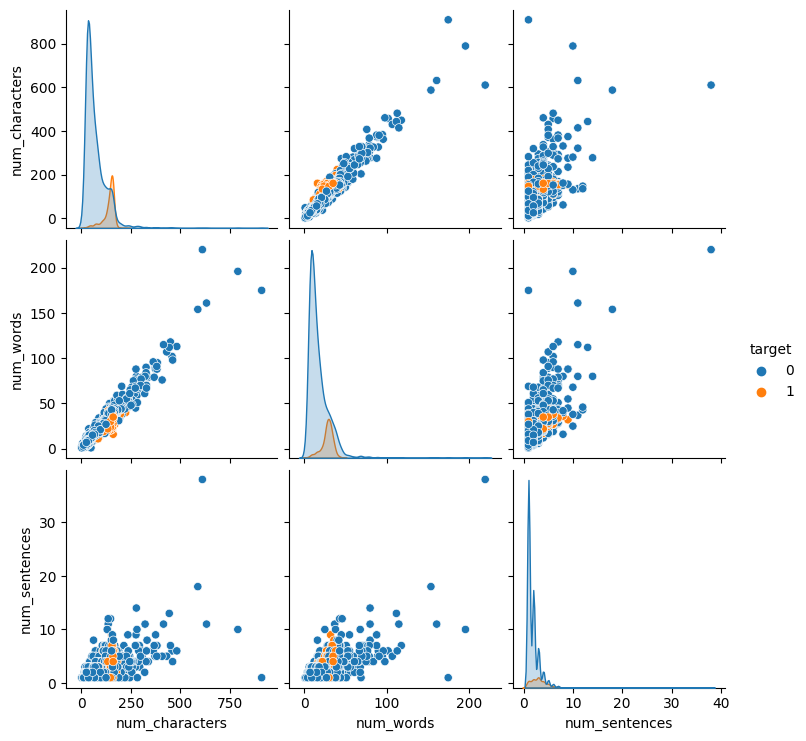

In [35]:
sns.pairplot(df,hue='target')

<ipython-input-36-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

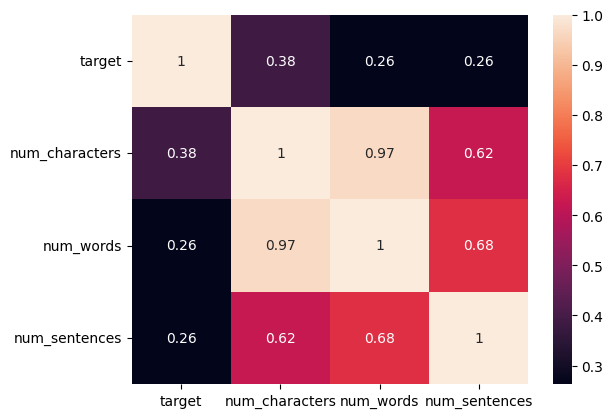

In [36]:
sns.heatmap(df.corr(),annot=True)

In [37]:
# examining the heatmap we can see that we can consider num_characters column as it has the highest corr with target . Lets continue

### ***Data Pre-processing***


In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')# just an example how stemming works

'walk'

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
#defining transform function
def transform_text(text):
  text = text.lower()
  text=nltk.word_tokenize(text)
  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)


  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

In [43]:
#testing transform function

transform_text('Are you unique enough? Find out from 30th August. www.areyouunique.co.uk')


'uniqu enough find 30th august'

In [44]:
df['text'][190]

'Are you unique enough? Find out from 30th August. www.areyouunique.co.uk'

In [45]:
df['transformed_text']=df['text'].apply(transform_text)

<ipython-input-45-98fa9b97913c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
wcl = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
spam_wcl=wcl.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))



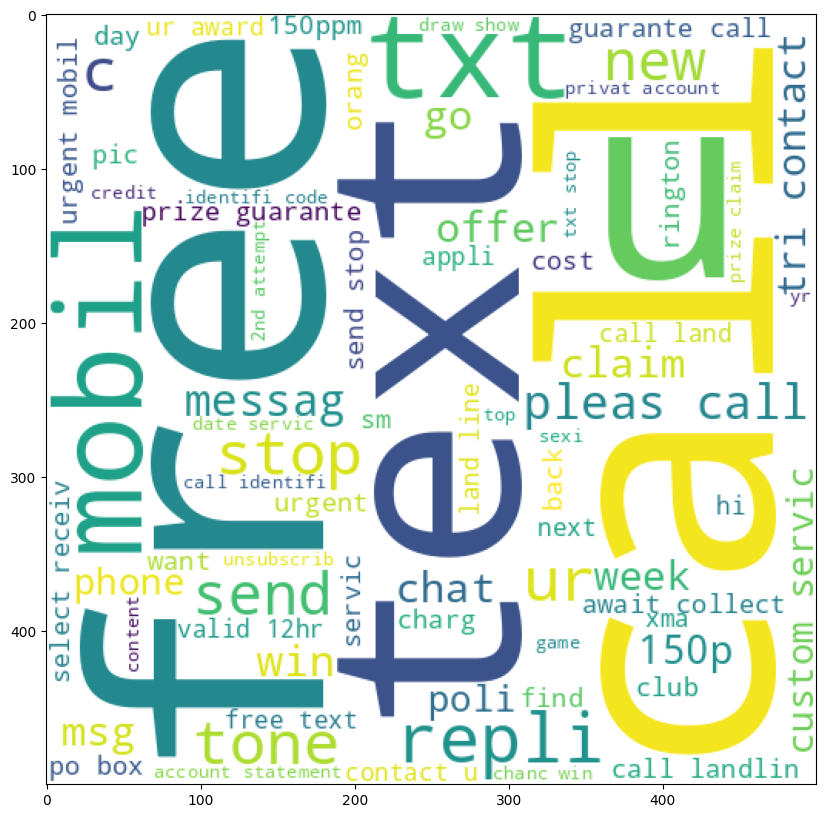

In [49]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wcl)

In [50]:
ham_wcl=wcl.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

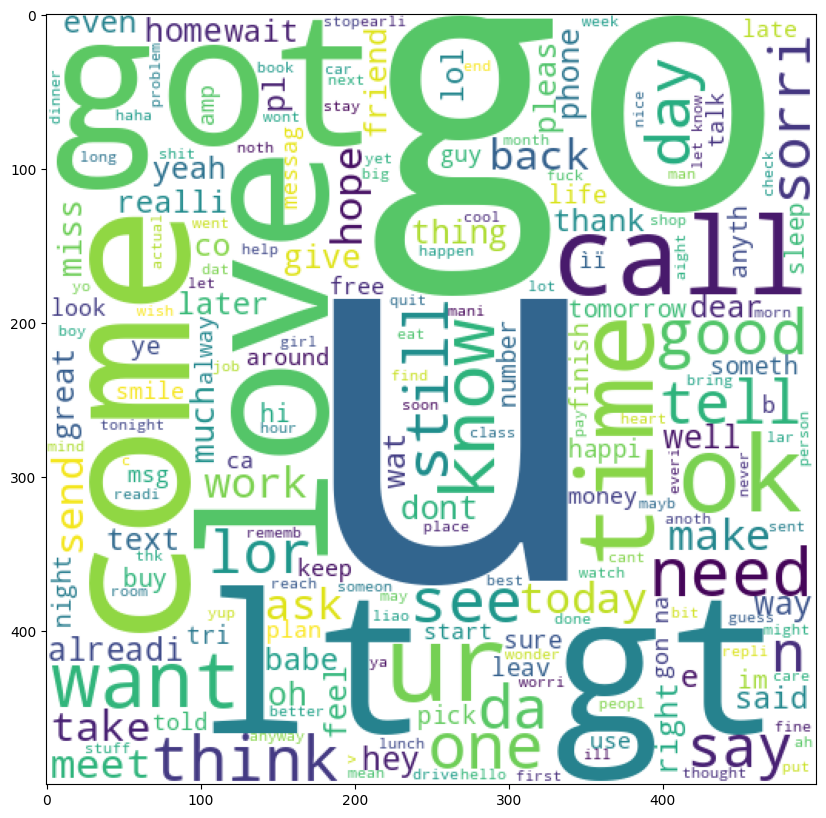

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wcl)

In [52]:
# lets check top 30 words of ham and spam

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
spam_corpus = []
for mssg in df[df['target']==1]['transformed_text'].tolist():
  for word in mssg.split():
    spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

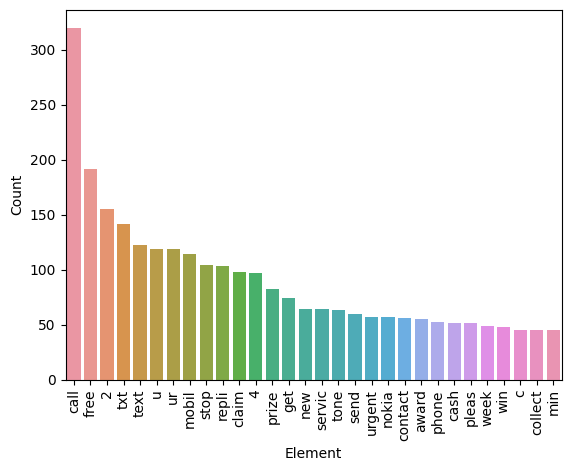

In [55]:
from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# hf=pd.DataFrame(Counter(spam_corpus).most_common(30))
# sns.barplot(hf[0],hf[1])

hf = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Element', 'Count'])

sns.barplot(x='Element', y='Count', data=hf)
plt.xticks(rotation='vertical')

In [56]:
ham_corpus = []
for mssg in df[df['target']==0]['transformed_text'].tolist():
  for word in mssg.split():
    ham_corpus.append(word)

In [57]:
len(ham_corpus)

35404

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

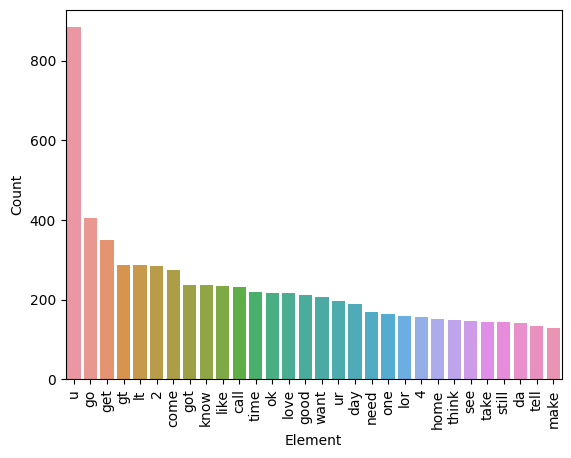

In [58]:
from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# hf=pd.DataFrame(Counter(spam_corpus).most_common(30))
# sns.barplot(hf[0],hf[1])

hf = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Element', 'Count'])

sns.barplot(x='Element', y='Count', data=hf)
plt.xticks(rotation='vertical')

## ***Model Building***

In [59]:
#Text Vectorization
# using bag of words

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [215]:
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [147]:
# X = cv.fit_transform(df['transformed_text'])
# print(X)

In [216]:
# converting sparse array to dense array for our convenience
X = cv.fit_transform(df['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [217]:
X.shape

(5169, 6708)

In [218]:
y = df['target'].values

In [219]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [220]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)


In [221]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [222]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [223]:

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.868522815158546
[[972 147]
 [ 23 151]]
0.5067114093959731


In [224]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.962877030162413
[[1090   29]
 [  19  155]]
0.842391304347826


In [225]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9636504253673627
[[1113    6]
 [  41  133]]
0.9568345323741008


In [226]:
# trying the whole thing using tfidf instead of cv

X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [227]:
X.shape

(5169, 3000)

In [228]:
y = df['target'].values

In [229]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [230]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [231]:

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8576952822892498
[[971 148]
 [ 36 138]]
0.4825174825174825


In [232]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

# huge improvement seen ....here in this problem statement precision is more important than accuracy

0.9690641918020109
[[1118    1]
 [  39  135]]
0.9926470588235294


In [233]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9775715390564579
[[1117    2]
 [  27  147]]
0.9865771812080537


In [166]:
# Tfidf + mnb is our choosen set
# Now I will try some other algorithms to see how they are behaving

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [235]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [237]:
# creating a dictionary with algo name with values of object name

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [238]:
# defining a classifier function
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [239]:
# just testing an example
train_classifier(knc,X_train,y_train,X_test,y_test)

(0.9071925754060325, 1.0)

In [240]:
# now creating a loop to print accuracy_scores & precision_scores of all the pre defined algorithms
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9667440061871616
Precision -  0.9645390070921985
For  KN
Accuracy -  0.9071925754060325
Precision -  1.0
For  NB
Accuracy -  0.9690641918020109
Precision -  0.9926470588235294
For  DT
Accuracy -  0.9350348027842227
Precision -  0.8629032258064516
For  LR
Accuracy -  0.9520494972931168
Precision -  0.9516129032258065
For  RF
Accuracy -  0.9690641918020109
Precision -  0.9926470588235294
For  AdaBoost
Accuracy -  0.9675174013921114
Precision -  0.9714285714285714
For  BgC
Accuracy -  0.9574632637277649
Precision -  0.8838709677419355
For  ETC
Accuracy -  0.974477958236659
Precision -  0.9731543624161074
For  GBDT
Accuracy -  0.9489559164733179
Precision -  0.95
For  xgb
Accuracy -  0.9698375870069605
Precision -  0.9655172413793104


In [173]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [174]:
# performance_df

,Algorithm,Accuracy,Precision
1,KN,0.897912,1.000000
2,NB,0.946636,1.000000
5,RF,0.963650,1.000000
8,ETC,0.965971,0.992424
0,SVC,0.966744,0.978102
6,AdaBoost,0.971384,0.972414
4,LR,0.946636,0.964602
10,xgb,0.968291,0.952381
9,GBDT,0.947409,0.949153
7,BgC,0.958237,0.905405


In [175]:
# NB, RF, ETC, SVC are the four algorithms that we can consider ...as thier accuracy and precisiion is better than others.

In [176]:
# performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

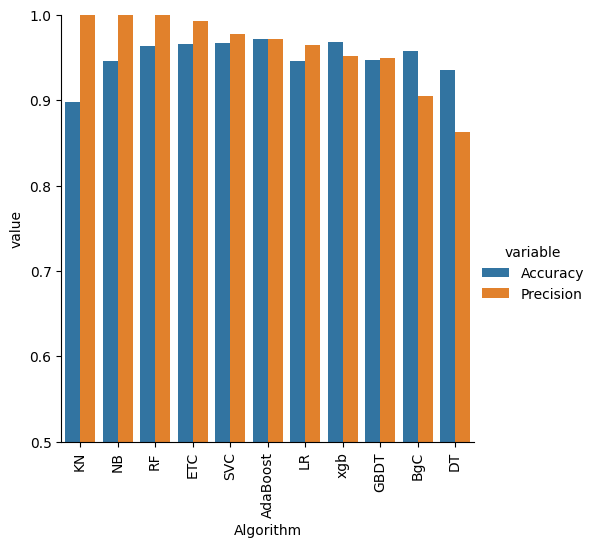

In [177]:
# sns.catplot(x = 'Algorithm', y='value',
#                hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [247]:
# model improvement
# to increase accuracy we could tume hyperparameter of idf
# tfidf=TfidfVectorizer(max_features=3000/max_features=1500...)
# so we can changes it by going back to previous segment

In [212]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_1500':accuracy_scores,'Precision_max_ft_1500':precision_scores}).sort_values('Precision_max_ft_1500',ascending=False)



In [213]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [214]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_1500,Precision_max_ft_1500
0,KN,0.897912,1.000000,0.911060,0.983607
1,NB,0.946636,1.000000,0.972158,0.992857
2,RF,0.963650,1.000000,0.971384,0.985816
3,ETC,0.965971,0.992424,0.970611,0.953333
4,SVC,0.966744,0.978102,0.971384,0.965986
5,AdaBoost,0.971384,0.972414,0.966744,0.945578
6,LR,0.946636,0.964602,0.956690,0.953846
7,xgb,0.968291,0.952381,0.972158,0.960000
8,GBDT,0.947409,0.949153,0.948183,0.942149
9,BgC,0.958237,0.905405,0.955916,0.882353


In [244]:
temp_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)



In [245]:
new_df2 = new_df.merge(temp_df,on='Algorithm')


In [246]:
new_df2

,Algorithm,Accuracy,Precision,Accuracy_max_ft_1500_x,Precision_max_ft_1500_x,Accuracy_max_ft_1500_y,Precision_max_ft_1500_y
0,KN,0.897912,1.000000,0.911060,0.983607,0.911060,0.983607
1,NB,0.946636,1.000000,0.972158,0.992857,0.972158,0.992857
2,RF,0.963650,1.000000,0.971384,0.985816,0.971384,0.985816
3,ETC,0.965971,0.992424,0.970611,0.953333,0.970611,0.953333
4,SVC,0.966744,0.978102,0.971384,0.965986,0.971384,0.965986
5,AdaBoost,0.971384,0.972414,0.966744,0.945578,0.966744,0.945578
6,LR,0.946636,0.964602,0.956690,0.953846,0.956690,0.953846
7,xgb,0.968291,0.952381,0.972158,0.960000,0.972158,0.960000
8,GBDT,0.947409,0.949153,0.948183,0.942149,0.948183,0.942149
9,BgC,0.958237,0.905405,0.955916,0.882353,0.955916,0.882353


In [ ]:
# we see a drastic improvement in case of NB ( Naive Bayes )


In [ ]:
# Using voting Ensembler



In [248]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [249]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [250]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [251]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9760247486465584
Precision 0.9863945578231292


In [ ]:
# although accuracy is satisfactory, maintaining the Naive Bayes Algo @ 1500 and 3000
# but precision is decreased.
# Now there are multiple ways we can implement ensemble learning, but let us limit to 2 approaches here
# I am now trying stackinh mechanisim
# In  stacking we can give weight to algorithms, where the most important and best performing algorithm will have largest weight

In [252]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [253]:
from sklearn.ensemble import StackingClassifier

In [254]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [255]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9822119102861562
Precision 0.968944099378882


In [256]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))